# Feature Tracking & Optical Flow

## Imports and Colab

In [ ]:
# Grab the data for feature tracking experiment
!wget -qq https://optical-flow-data.s3.eu-west-3.amazonaws.com/images.zip
# unzip the Image Folder and remove images.zip folder
!unzip -qq images.zip && rm images.zip
# make output directory for storing the results
!mkdir output
# check all the files and directories
!ls

images	output	sample_data


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from google.colab.patches import cv2_imshow

Feature Tracking: Tracking Visual Features.

In [ ]:
# Load Different Image Pairs
img1 = cv2.imread("images/image0.jpg")
img2 = cv2.imread("images/image1.jpg")

# INITIALIZE FAST DETECTOR AND BRIEF DESCRIPTOR
fast = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

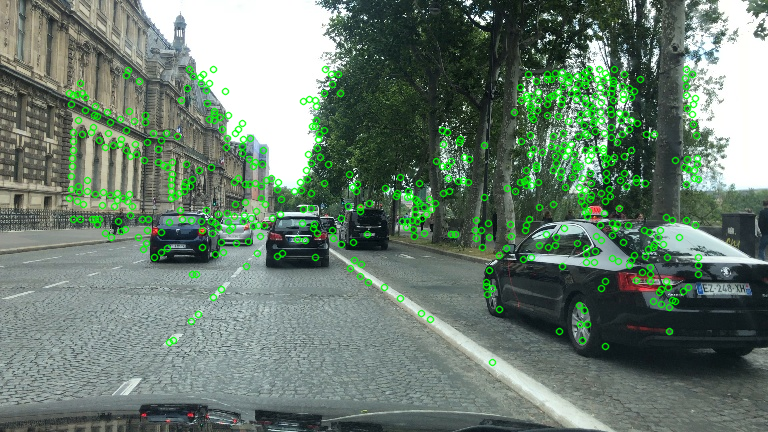

In [ ]:
# DETECTOR
kp = fast.detect(img1,None)

# DESCRIPTOR
kp1, des1 = brief.compute(img1, kp)

# KEYPOINTS DRAWN
img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
cv2_imshow(img1_kp)

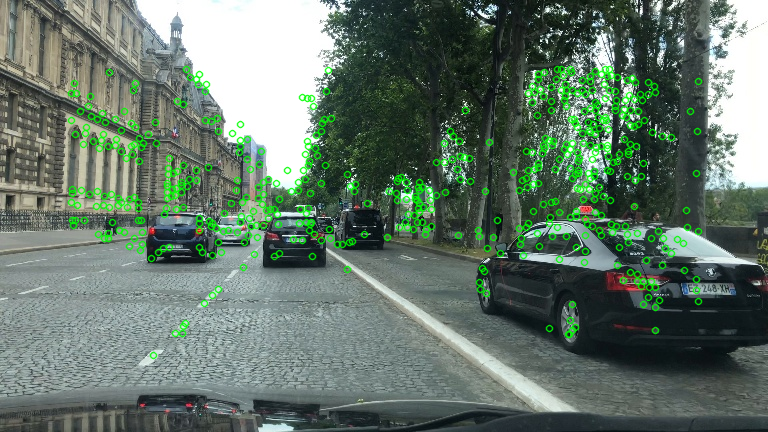

In [ ]:
# DETECTOR
kp = fast.detect(img2,None)
# DESCRIPTOR
kp2, des2 = brief.compute(img2, kp)

# KEYPOINTS DRAWN
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
cv2_imshow(img2_kp)

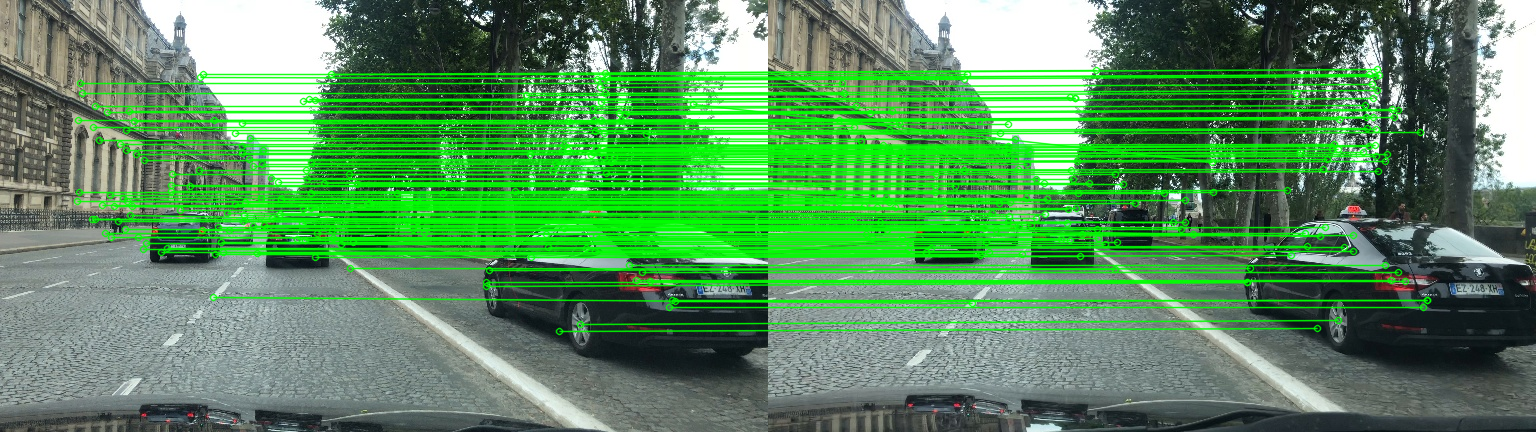

In [ ]:
#FLANN MATCHING
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(np.float32(des1),np.float32(des2),k=2) # Use NP.FLOAT32 for ORB, BRIEF, etc

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>10:
    p1 = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    p2 = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    flags = 2)

img_briefmatch = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv2_imshow(img_briefmatch)